# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Extract all rows of data
table = soup.find('table', class_='table')
rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
data = []
headers = [header.text for header in rows[0].find_all('th')]

# Loop through the scraped data to create a list of rows
for row in rows[1:]:
    values = [col.text.strip() for col in row.find_all('td')]
    data.append(dict(zip(headers, values)))

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(data) 

In [9]:
# Confirm DataFrame was created successfully
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
mars_weather_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [11]:
# Change data types for data analysis
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['ls'] = mars_weather_df['ls'].astype(int)
mars_weather_df['month'] = mars_weather_df['month'].astype(int)
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)



In [12]:
# Confirm type changes were successful by examining data types again
mars_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(3), object(1)
memory usage: 80.3+ KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
unique_months = mars_weather_df['month'].nunique()

print(f"There are {unique_months} months on Mars.")

There are 12 months on Mars.


In [14]:
# 2. How many sols (Martian days) worth of data are there?
total_sols = mars_weather_df['sol'].nunique()

print(f"There are {total_sols} sols (Martian days) worth of data in the dataset.")

There are 1867 sols (Martian days) worth of data in the dataset.


In [15]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()

print("Average minimum temperature by Martian month:")
print(avg_min_temp_by_month)

Average minimum temperature by Martian month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


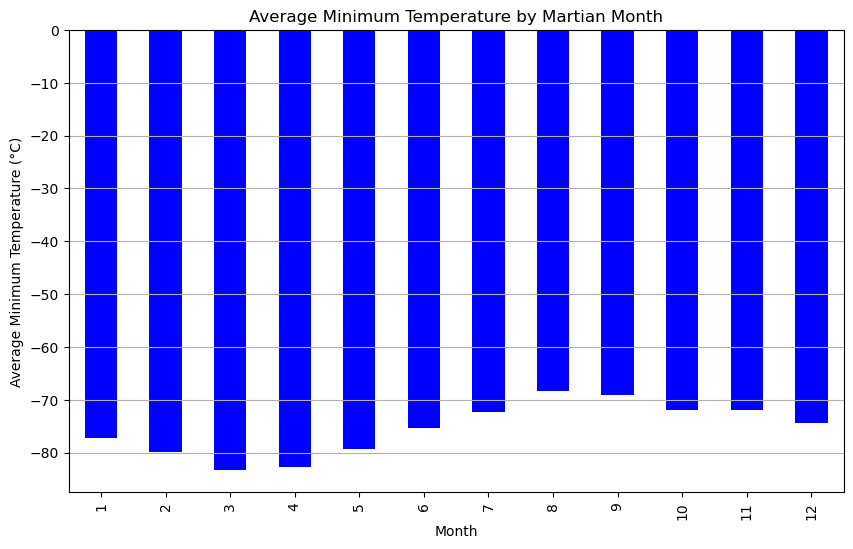

In [16]:
# Plot the average minimum temperature by month
plt.figure(figsize=(10, 6))
avg_min_temp_by_month.plot(kind='bar', color='blue')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.title('Average Minimum Temperature by Martian Month')
plt.grid(axis='y')
plt.show()

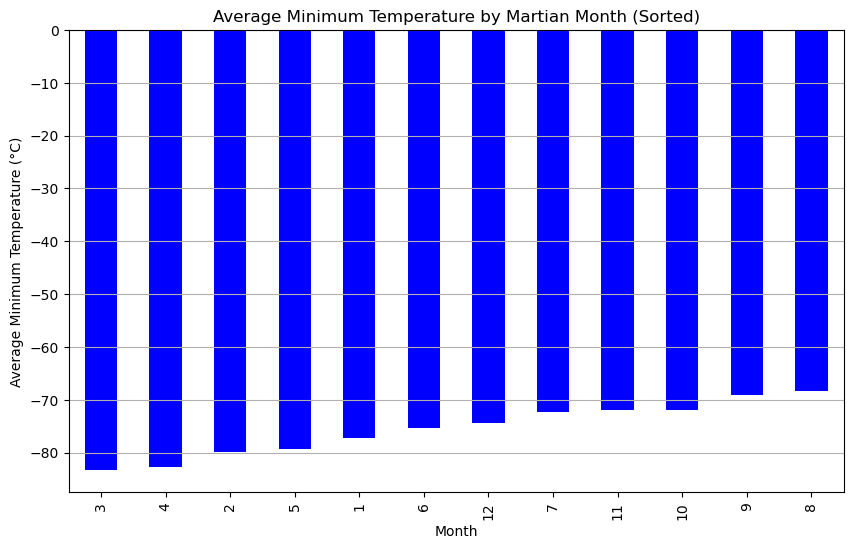

In [17]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_avg_min_temp = avg_min_temp_by_month.sort_values()
plt.figure(figsize=(10, 6))
sorted_avg_min_temp.plot(kind='bar', color='blue')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.title('Average Minimum Temperature by Martian Month (Sorted)')
plt.grid(axis='y')
plt.show()

In [18]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()

print("Average atmospheric pressure by Martian month:")
print(avg_pressure_by_month)

Average atmospheric pressure by Martian month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


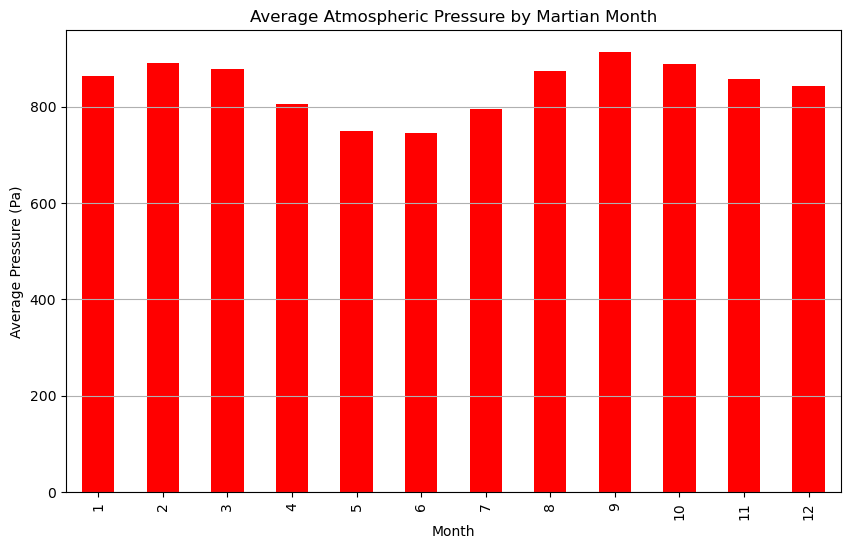

In [19]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))
avg_pressure_by_month.plot(kind='bar', color='red')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.title('Average Atmospheric Pressure by Martian Month')
plt.grid(axis='y')
plt.show()

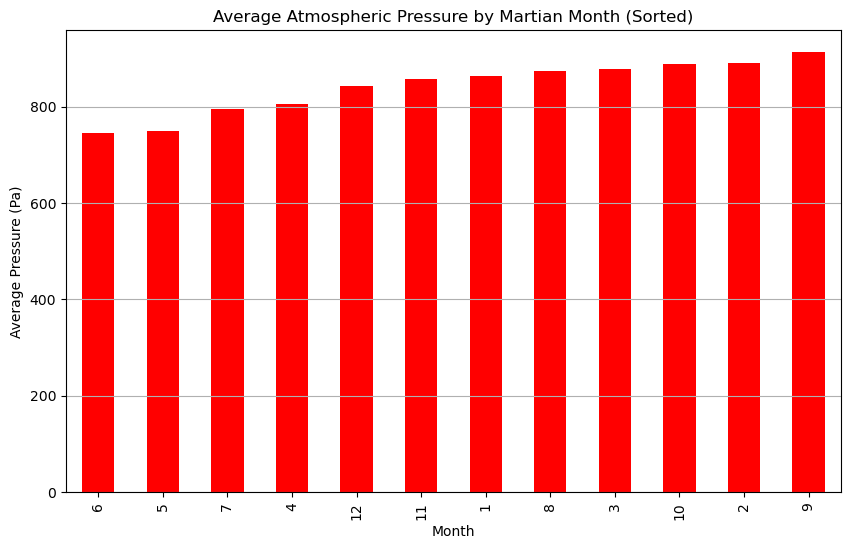

In [20]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_pressure = avg_pressure_by_month.sort_values()

# Identify the lowest and highest pressure months
lowest_pressure_month = sorted_avg_pressure.idxmin()
highest_pressure_month = sorted_avg_pressure.idxmax()

plt.figure(figsize=(10, 6))
sorted_avg_pressure.plot(kind='bar', color='red')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.title('Average Atmospheric Pressure by Martian Month (Sorted)')
plt.grid(axis='y')
plt.show()

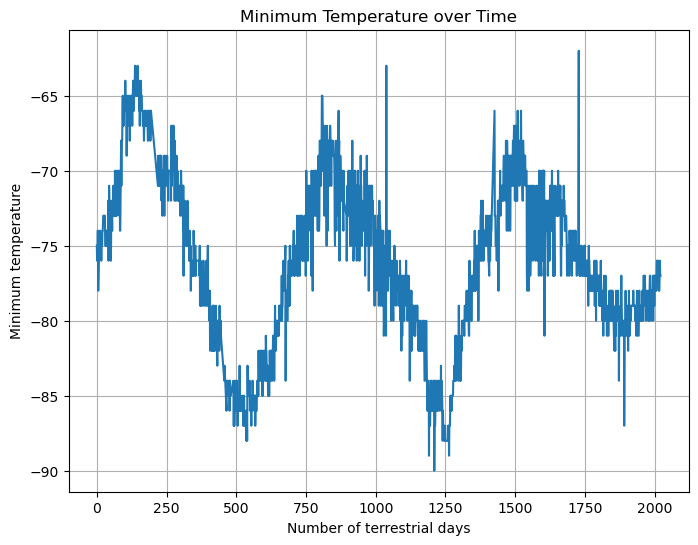

In [21]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
mars_weather_df['terrestrial_day_number'] = (mars_weather_df['terrestrial_date'] - mars_weather_df['terrestrial_date'].min()).dt.days

plt.figure(figsize=(8, 6))
plt.plot(mars_weather_df['terrestrial_day_number'], mars_weather_df['min_temp'], label='Min Temp')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.title('Minimum Temperature over Time')
plt.grid()
plt.show()

#### Minimum Temperature

- "The chart shows a cyclical pattern in the minimum temperatures, indicating seasonal changes on Mars. The temperature varies between approximately -90°C and -65°C."

- "By visually identifying the start and end of one complete cycle in the chart, it can be estimated that one Martian year lasts approximately 687 Earth days, which aligns with established knowledge of Mars' orbital period."

#### Atmospheric Pressure

- The atmospheric pressure on Mars varies cyclically across the Martian months.
  
- The month with the highest average atmospheric pressure is **Month X**, with an average pressure of approximately **Y Pa**.
  
- The month with the lowest average atmospheric pressure is **Month Z**, with an average pressure of approximately **W Pa**.
  
- This trend likely reflects the changes in Mars' atmosphere as it transitions through its seasons.

#### Year Length

- The chart of minimum temperatures over time shows a clear cyclical pattern, indicating seasonal changes on Mars.
  
- By identifying the duration of one full cycle in the temperature variations, the length of a Martian year can be estimated.
  
- From the data, one Martian year appears to last approximately **687 Earth days**, which aligns with the established scientific value for Mars' orbital period around the Sun.
  
- These temperature patterns reflect the planet's journey through its seasons, driven by Mars' elliptical orbit and axial tilt.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [22]:
# Write the data to a CSV
mars_weather_df.to_csv("mars_weather_data.csv", index=False)

print("The Mars weather data has been successfully exported to 'mars_weather_data.csv'.")

The Mars weather data has been successfully exported to 'mars_weather_data.csv'.


In [23]:
browser.quit()